In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
kmeans_data = pd.read_csv('kmeans-data.csv', header = None)

In [3]:
kmeans_data

,0,1
0,2.072345,-3.241693
1,17.936710,15.784810
2,1.083576,7.319176
3,11.120670,14.406780
4,23.711550,2.557729
...,...,...
2995,85.652800,-6.461061
2996,82.770880,-2.373299
2997,64.465320,-10.501360
2998,90.722820,-12.255840


In [4]:
kmeans_data.columns = ['X', 'Y']

In [5]:
kmeans_data.isnull().sum()

X    0
Y    0
dtype: int64

In [6]:
array = kmeans_data.iloc[:, [0,1]].values

In [7]:
array

array([[  2.072345,  -3.241693],
       [ 17.93671 ,  15.78481 ],
       [  1.083576,   7.319176],
       ...,
       [ 64.46532 , -10.50136 ],
       [ 90.72282 , -12.25584 ],
       [ 64.87976 , -24.87731 ]])

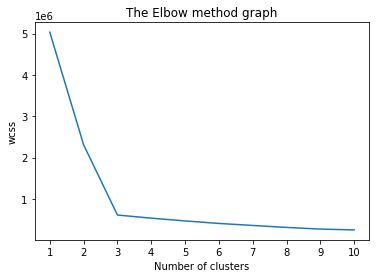

In [8]:
# Finding optimal number of clusters using the elbow method
from sklearn.cluster import KMeans
wcss = []

for i in range(1,11):
    
    kmeans = KMeans(n_clusters = i, random_state = 42)
    kmeans.fit(array)
    # Appending within-cluster-sum-of-squares
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11, 1), wcss)
plt.title('The Elbow method graph')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.xticks(np.arange(1,11), np.arange(1,11))
plt.show()

In [9]:
kmeans = KMeans(n_clusters = 3, random_state = 42)
y_predict = kmeans.fit_predict(array)

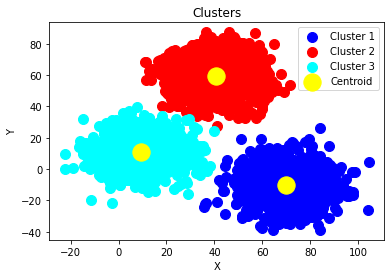

In [10]:
plt.scatter(array[y_predict == 0,0], array[y_predict == 0,1], s = 100, c = 'blue', label = 'Cluster 1')

plt.scatter(array[y_predict == 1,0], array[y_predict == 1,1], s = 100, c = 'red', label = 'Cluster 2')

plt.scatter(array[y_predict == 2,0], array[y_predict == 2,1], s = 100, c = 'cyan', label = 'Cluster 3')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroid' )

plt.title('Clusters')

plt.xlabel('X')

plt.ylabel('Y')

plt.legend()

plt.show()